#  Sinusoids  - Time and Spectrum  
This program is an introductory program to DSP

In [1]:
%matplotlib inline
%matplotlib notebook
import numpy as np
import matplotlib.pyplot  as plt
import scipy as sp
from scipy.fftpack import fft, ifft, fftfreq

### Sampling Rate Effects

The graphs produced are the the exact same signal with different sampling rates. The signal with 10x the Nyquist Rate is a noticably cleaner sin wave while the signal that only has a sampling rate of 4x the Nyquist Rate only contains the peaks, the zero-padded points, and the x-intercepts.

<Container object of 3 artists>

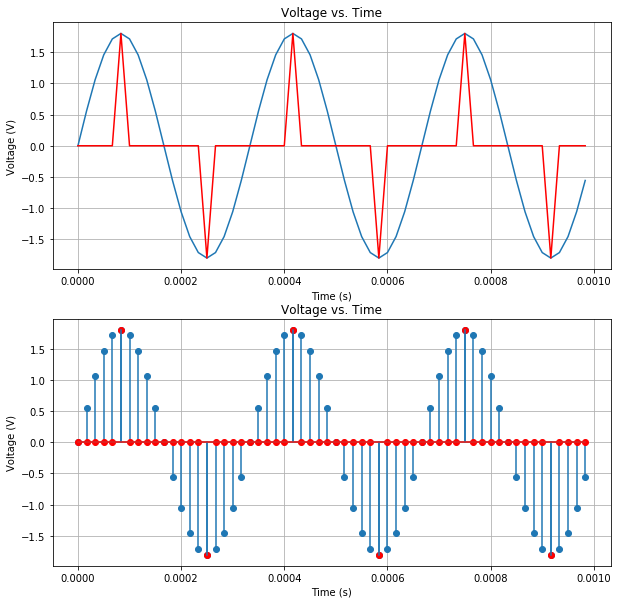

In [2]:
duration =  1e-3 # Duration of the sample
Fs = 20*3000    # Sampling frequency

# Signal
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
t  = np.arange(0,duration, 1/Fs) # X axis: Time & Samples
s1 = amp*np.sin(2*np.pi*freq*t + theta)

# Signal at triple the sampling rate
freq  = 3000 # Frequency of the signal
amp   = 1.8  # Signal Amplitutde
theta = 0    # Phase Control
Fs_slow = Fs/5    # 5x less the sampling rate
t2  = np.arange(0,duration, 1/Fs_slow) # X axis: Time & Samples
s2 = amp*np.sin(2*np.pi*freq*t2 + theta)
zero_array = np.zeros(len(s2))  
zero_and_sig = np.vstack([s2, zero_array, zero_array, zero_array, zero_array])
s2 = zero_and_sig.flatten(order='F')

# Waveform display
fig = plt.figure('position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[0].grid()
ax[0].plot(t,s1, label='s1')
ax[0].plot(t,s2, label='s2', color = 'red')

#Stem plot
ax[1].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[1].grid()
ax[1].stem(t,s1, use_line_collection=True)
ax[1].stem(t,s2, use_line_collection=True, markerfmt='ro')

### Frequency Domain
The magnitude and phase of the signal is represented in the plots below. 

<Container object of 3 artists>

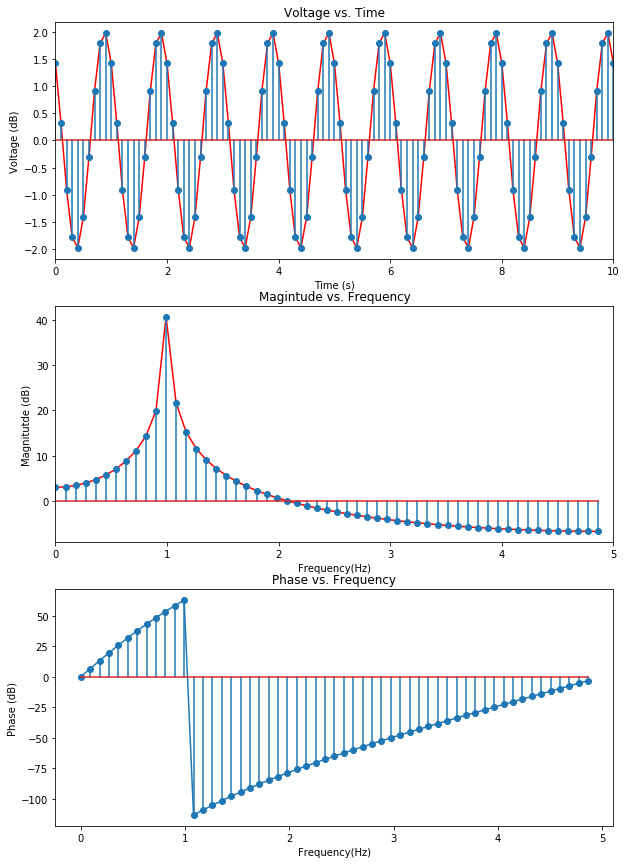

In [7]:
# Signal
duration = 11.01 # Duration offset from an integer to make the FFT look appropriate
freq  = 1
Fs = 10*freq
amp   = 2
phase = 135*np.pi/180 # degrees converted to radians
t  = np.arange(0,duration, 1/Fs)
s_total = amp*np.sin(2*np.pi*freq*t + phase)


# FFT Setup
nfft = len(s_total) # Num of bins
S = fft(s_total, nfft)
phase = np.angle(S, deg = True)
fft_freq = fftfreq(nfft, 1/Fs)
SdB = 20*np.log10(abs(S))
           

# Displaying the plots
plt.figure(figsize=[10,20])


# Signal plot
plt.subplot(4,1,1)
plt.xlim(0,10)
plt.title('Voltage vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (dB)')
plt.plot(t, s_total,'r')
plt.stem(t,s_total,use_line_collection=True)


# magnitude plot
plt.subplot(4,1,2)
plt.xlim(0,5*freq)
plt.plot(fft_freq[0:nfft//2], SdB[0:nfft//2], 'r')
plt.stem(fft_freq[0:nfft//2], SdB[0:nfft//2], use_line_collection=True)
plt.title('Magintude vs. Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitutde (dB)')


# phase plot
plt.subplot(4,1,3)
plt.title('Phase vs. Frequency')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase (dB)')
plt.plot(fft_freq[0:nfft//2], phase[0:nfft//2])
plt.stem(fft_freq[0:nfft//2], phase[0:nfft//2], use_line_collection=True)

### FFT of a Zero Padded Signal
The more zeros added, the more narrow the longer the lobes get.

/usr/lib/python3/dist-packages/scipy/fftpack/basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


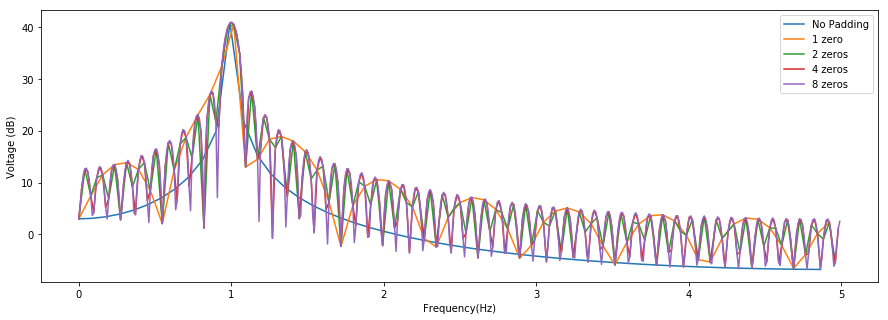

In [25]:
nfft_z1 = int(1*2**(np.ceil(np.log2(len(s_total)))))
nfft_z2 = int(2*2**(np.ceil(np.log2(len(s_total)))))
nfft_z4 = int(4*2**(np.ceil(np.log2(len(s_total)))))
nfft_z8 = int(8*2**(np.ceil(np.log2(len(s_total)))))


S_z1 = fft(s_total, nfft_z1)
S_z2 = fft(s_total, nfft_z2)
S_z4 = fft(s_total, nfft_z4)
S_z8 = fft(s_total, nfft_z8)


fft_freq_z1 = fftfreq(nfft_z1, 1/Fs)
fft_freq_z2 = fftfreq(nfft_z2, 1/Fs)
fft_freq_z4 = fftfreq(nfft_z4, 1/Fs)
fft_freq_z8 = fftfreq(nfft_z8, 1/Fs)

plt.figure(figsize=(15,5))
plt.plot(fft_freq[0:nfft//2], 20*np.log10(abs(S[0:nfft//2])), label="No Padding")
plt.plot(fft_freq_z1[0:nfft_z1//2], 20*np.log10(abs(S_z1[0:nfft_z1//2])), label="1 zero")
plt.plot(fft_freq_z2[0:nfft_z2//2], 20*np.log10(abs(S_z2[0:nfft_z2//2])), label="2 zeros")
plt.plot(fft_freq_z4[0:nfft_z4//2], 20*np.log10(abs(S_z4[0:nfft_z4//2])), label="4 zeros")
plt.plot(fft_freq_z8[0:nfft_z8//2], 20*np.log10(abs(S_z8[0:nfft_z8//2])), label="8 zeros")

plt.xlabel('Frequency(Hz)')
plt.ylabel('Voltage (dB)')
plt.legend()

### Signal Combination
Initialize two signals, add them, and display the result using line and stem plots.

_Notes_  
- Adding two signals at the same frequency and amplitduted with different phases introduces a phase and amplitude shift in the result. My intuition failed me thinking that I would be able to see two signals.

<Container object of 3 artists>

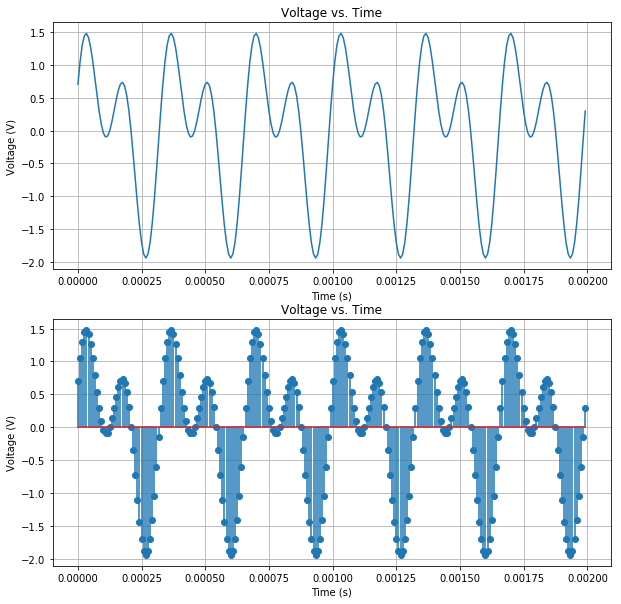

In [5]:
# Sampling Windows Setup
duration =  2e-3 # Duration of the sample
Fs = 20*6000     # Sampling frequency

# 1st Signal
freq  = 3000 
amp   = 1
phase = 0 * np.pi/180 # degrees converted to radians
t  = np.arange(0,duration, 1/Fs)
s1 = amp*np.sin(2*np.pi*freq*t + phase)

# 2nd  Signal
freq  = 6000 
amp   = 1  
phase = 45 * np.pi/180 
t  = np.arange(0,duration, 1/Fs)
s2 = amp*np.sin(2*np.pi*freq*t + phase)

#Combination of two signals
s_total = s1  + s2

# Waveform display
fig = plt.figure('position', [10,10])
ax  = fig.subplots(2,1) #Fig: figure object, ax: plot axes
ax[0].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[0].grid()
ax[0].plot(t,s_total)

#Stem plot
ax[1].set(xlabel='Time (s)', ylabel='Voltage (V)', title='Voltage vs. Time')
ax[1].grid()
ax[1].stem(t,s_total, use_line_collection=True)